<a href="https://colab.research.google.com/github/2series/test/blob/main/test_copy2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data

In [73]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [74]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz

file_id = '12nRGXBL6u38sCET_x1OmLW6Hlthob-e_' # app_data_final.csv
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [75]:
# The shareable link
link = 'https://drive.google.com/open?id=12nRGXBL6u38sCET_x1OmLW6Hlthob-e_'

In [76]:
# Verify everything after '='
fluff, id = link.split('=')
print (id) 

12nRGXBL6u38sCET_x1OmLW6Hlthob-e_


In [77]:
# Libraries are imported at the start of nb
!pip install scikit-plot

In [78]:
# Import libraries and prepare the data
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
# To ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore")

from pandas.plotting import scatter_matrix

from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import svm
plt.style.use('ggplot')

In [79]:
# Stored dataset in a Pandas Dataframe
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('app_data_final.csv')  
df = pd.read_csv('app_data_final.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,nan,1,0,Laborers,1.000,2,10,Business Entity Type 3,0.083,0.263,0.139,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,nan,1,0,Core staff,2.000,1,11,School,0.311,0.622,nan,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,26.000,1,0,Laborers,1.000,2,9,Government,nan,0.556,0.730,0.000,0.000,0.000,0.000,0.000,0.000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.500,29686.500,297000.000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008,nan,0,0,Laborers,2.000,2,17,Business Entity Type 3,nan,0.650,nan,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.000,21865.500,513000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.029,nan,0,0,Core staff,1.000,2,11,Religion,nan,0.323,nan,0.000,0.000,0.000,0.000,0.000,0.000


In [80]:
df.shape

(307511, 34)

In [81]:
# Change behaviour globaly
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [82]:
df.columns.unique()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [83]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,307511.000,307511.000,307499.000,307233.000,307511.000,104582.000,307511.000,307511.000,307509.000,307511.000,307511.000,134133.000,306851.000,246546.000,265992.000,265992.000,265992.000,265992.000,265992.000,265992.000
mean,278180.519,0.081,0.417,168797.919,599026.000,27108.574,538396.207,0.021,12.061,0.281,0.057,2.153,2.052,12.063,0.502,0.514,0.511,0.006,0.007,0.034,0.267,0.265,1.900
std,102790.175,0.272,0.722,237123.146,402490.777,14493.737,369446.461,0.014,11.945,0.450,0.231,0.911,0.509,3.266,0.211,0.191,0.195,0.084,0.111,0.205,0.916,0.794,1.869
min,100002.000,0.000,0.000,25650.000,45000.000,1615.500,40500.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.015,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000
25%,189145.500,0.000,0.000,112500.000,270000.000,16524.000,238500.000,0.010,5.000,0.000,0.000,2.000,2.000,10.000,0.334,0.392,0.371,0.000,0.000,0.000,0.000,0.000,0.000
50%,278202.000,0.000,0.000,147150.000,513531.000,24903.000,450000.000,0.019,9.000,0.000,0.000,2.000,2.000,12.000,0.506,0.566,0.535,0.000,0.000,0.000,0.000,0.000,1.000
75%,367142.500,0.000,1.000,202500.000,808650.000,34596.000,679500.000,0.029,15.000,1.000,0.000,3.000,2.000,14.000,0.675,0.664,0.669,0.000,0.000,0.000,0.000,0.000,3.000
max,456255.000,1.000,19.000,117000000.000,4050000.000,258025.500,4050000.000,0.073,91.000,1.000,1.000,20.000,3.000,23.000,0.963,0.855,0.896,4.000,9.000,8.000,27.000,261.000,25.000


In [84]:
# Preview data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

# Data Cleaning

In [85]:
# Preview NaN
df.isnull().any()

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
FLAG_OWN_REALTY               False
CNT_CHILDREN                  False
AMT_INCOME_TOTAL              False
AMT_CREDIT                    False
AMT_ANNUITY                    True
AMT_GOODS_PRICE                True
NAME_TYPE_SUITE                True
NAME_INCOME_TYPE              False
NAME_EDUCATION_TYPE           False
NAME_FAMILY_STATUS            False
NAME_HOUSING_TYPE             False
REGION_POPULATION_RELATIVE    False
OWN_CAR_AGE                    True
FLAG_PHONE                    False
FLAG_EMAIL                    False
OCCUPATION_TYPE                True
CNT_FAM_MEMBERS                True
REGION_RATING_CLIENT          False
HOUR_APPR_PROCESS_START       False
ORGANIZATION_TYPE             False
EXT_SOURCE_1                   True
EXT_SOURCE_2                   True
EXT_SOURCE_3                

In [86]:
# Quantify number of NaN
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
OWN_CAR_AGE                   202929
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
HOUR_APPR_PROCESS_START            0
ORGANIZATION_TYPE                  0
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
E

In [87]:
# Preview percentage of null values in each column
missing_val = ((df.isna().sum()) / len(df.index)).sort_values(ascending=False)
missing_val = missing_val[missing_val > 0]
print(missing_val * 100)

OWN_CAR_AGE                  65.991
EXT_SOURCE_1                 56.381
OCCUPATION_TYPE              31.346
EXT_SOURCE_3                 19.825
AMT_REQ_CREDIT_BUREAU_YEAR   13.502
AMT_REQ_CREDIT_BUREAU_MON    13.502
AMT_REQ_CREDIT_BUREAU_WEEK   13.502
AMT_REQ_CREDIT_BUREAU_DAY    13.502
AMT_REQ_CREDIT_BUREAU_HOUR   13.502
AMT_REQ_CREDIT_BUREAU_QRT    13.502
NAME_TYPE_SUITE               0.420
EXT_SOURCE_2                  0.215
AMT_GOODS_PRICE               0.090
AMT_ANNUITY                   0.004
CNT_FAM_MEMBERS               0.001
dtype: float64


In [88]:
# Drop columns where NaN is > 30%
df.drop(missing_val[missing_val > 0.3].index, axis=1, inplace=True)

In [89]:
# Drop rows where NaN is > 30
df.dropna(axis=0, thresh=30, inplace=True)

In [90]:
df.shape

(265579, 31)

In [91]:
# Quantify number of NaN
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      11
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                 868
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
HOUR_APPR_PROCESS_START           0
ORGANIZATION_TYPE                 0
EXT_SOURCE_2                    430
EXT_SOURCE_3                  19243
AMT_REQ_CREDIT_BUREAU_HOUR        0
AMT_REQ_CREDIT_BUREAU_DAY         0
AMT_REQ_CREDIT_BUREAU_WEEK  

# Impute NaN Values

In [92]:
# numeric columns
df.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)

# categorical columns
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [93]:
# Preview unique values
unique_val = df.apply(lambda x: len(pd.unique(x)), axis=0).sort_values(ascending=False)
unique_val

SK_ID_CURR                    265579
EXT_SOURCE_2                  111938
AMT_ANNUITY                    13193
AMT_CREDIT                      5265
AMT_INCOME_TOTAL                2182
AMT_GOODS_PRICE                  840
EXT_SOURCE_3                     815
REGION_POPULATION_RELATIVE        81
ORGANIZATION_TYPE                 58
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
CNT_FAM_MEMBERS                   17
CNT_CHILDREN                      15
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_DAY          9
NAME_INCOME_TYPE                   8
NAME_TYPE_SUITE                    8
NAME_HOUSING_TYPE                  6
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 5
CODE_GENDER                        3
REGION_RATING_CLIENT               3
FLAG_PHONE                         2
FLAG_EMAIL                         2
F

In [94]:
# Lets sample the count for variables having unique values
def column_analyse(x, df=df): 
    print(df[x].value_counts(), '\n', df[x].value_counts()/len(df[x]))

column_analyse('TARGET') 
column_analyse('NAME_CONTRACT_TYPE')
column_analyse('FLAG_EMAIL')
column_analyse('REGION_RATING_CLIENT')

0    245070
1     20509
Name: TARGET, dtype: int64 
 0   0.923
1   0.077
Name: TARGET, dtype: float64
Cash loans         240825
Revolving loans     24754
Name: NAME_CONTRACT_TYPE, dtype: int64 
 Cash loans        0.907
Revolving loans   0.093
Name: NAME_CONTRACT_TYPE, dtype: float64
0    250240
1     15339
Name: FLAG_EMAIL, dtype: int64 
 0   0.942
1   0.058
Name: FLAG_EMAIL, dtype: float64
2    197021
3     41366
1     27192
Name: REGION_RATING_CLIENT, dtype: int64 
 2   0.742
3   0.156
1   0.102
Name: REGION_RATING_CLIENT, dtype: float64


### Observation

* We will remove SK_ID_CURR as it is 100% unique
* TARGET, NAME_CONTRACT_TYPE and FLAG_EMAIL are highly imbalanced, more than 90%
* EXT_SOURCE_2, EXT_SOURCE_3, ORGANIZATION_TYPE are too detailed for analysis



In [95]:
delete_cols = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_EMAIL', 
               'FLAG_PHONE', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 
               'EXT_SOURCE_3', 'ORGANIZATION_TYPE']

df.drop(delete_cols, axis=1, inplace=True)

In [96]:
df.shape

(265579, 23)

# Visualizations

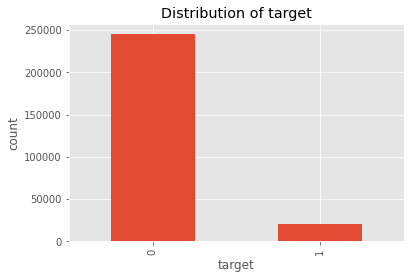

In [97]:
# TARGET
df['TARGET'].value_counts().plot.bar()
plt.xlabel('target')
plt.ylabel('count')
plt.title('Distribution of target')
plt.show()

Our dataset has an unequal distribution of target class

O - non-default 

1 - default

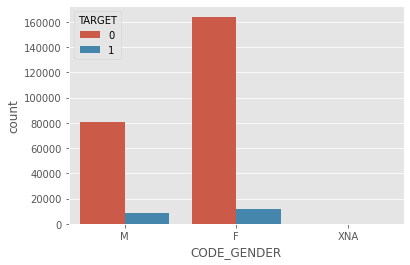

In [98]:
# CODE_GENDER
## GENDER OF LOAN APPLICANTS
sns.countplot(x='CODE_GENDER', hue='TARGET', data=df)

### Observation

Females clients make-up 2x the number of male clients

In [99]:
# CODE_GENDER
# Change XNA to Male as these data points are too low
#df['COED_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'M' if x in ['XNA'] else x) 

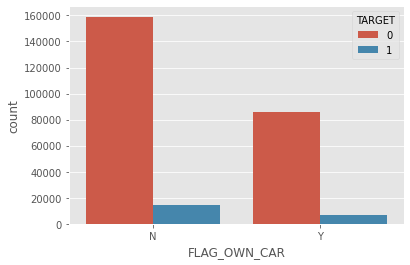

In [100]:
# FLAG_OWN_CAR 
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=df)

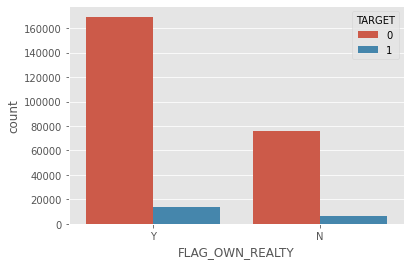

In [101]:
# FLAG_OWN_REALTY
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=df)

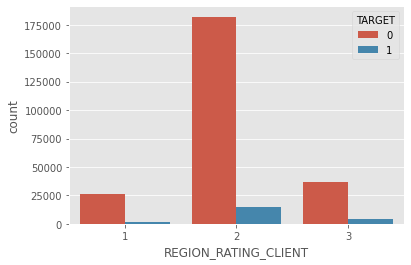

In [102]:
# REGION_RATING_CLIENT
## REGIONS WERE BORROWER(S) RESIDE ACCORDING
sns.countplot(x='REGION_RATING_CLIENT', hue='TARGET', data=df)

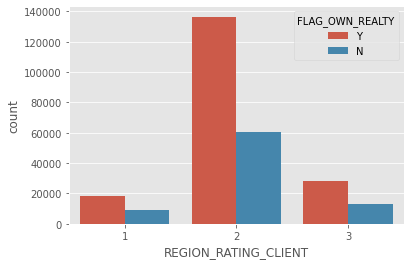

In [103]:
# REGION_RATING_CLIENT
sns.countplot(x='REGION_RATING_CLIENT', hue='FLAG_OWN_REALTY', data=df)

### OBSERVATION

Interesting this is not ordinal data

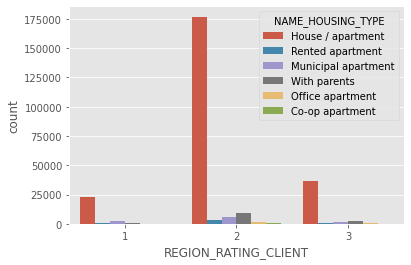

In [104]:
# REGION_RATING_CLIENT
sns.countplot(x='REGION_RATING_CLIENT', hue='NAME_HOUSING_TYPE', data=df)

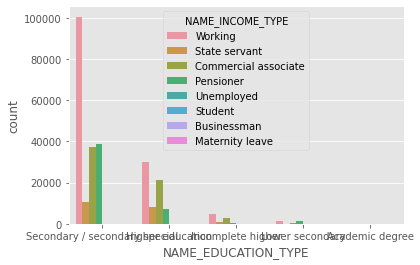

In [105]:
# NAME_EDUCATION_TYPE
sns.countplot(x='NAME_EDUCATION_TYPE', hue='NAME_INCOME_TYPE', data=df)

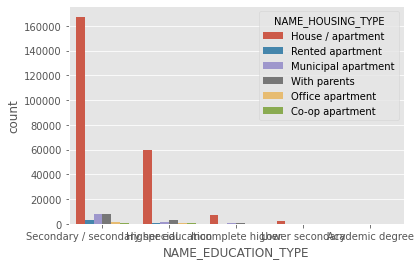

In [106]:
# NAME_HOUSING_TYPE
sns.countplot(x='NAME_EDUCATION_TYPE', hue='NAME_HOUSING_TYPE', data=df)

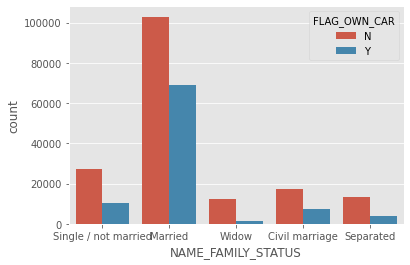

In [107]:
# NAME_FAMILY_STATUS
sns.countplot(x='NAME_FAMILY_STATUS', hue='FLAG_OWN_CAR', data=df)

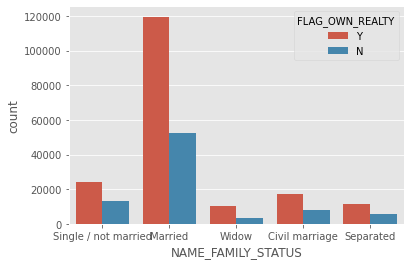

In [108]:
# NAME_FAMILY_STATUS
## STATUS OF BORROWER PROVIDED ON LOAN APPLICATION
sns.countplot(x='NAME_FAMILY_STATUS', hue='FLAG_OWN_REALTY', data=df)

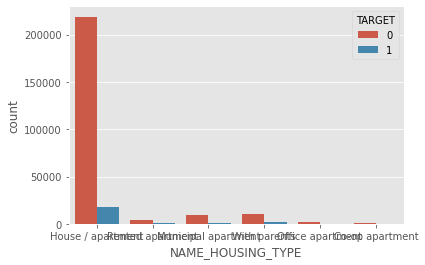

In [109]:
# NAME_HOUSING_TYPE
## STATUS PROVIDED ON LOAN APPLICATION
sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', data=df)

In [110]:
# NAME_HOUSING_TYPE
# Change Municipal, Office, Co-op to RENTED as these data points are too low
#df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].apply(lambda x: 'Rented apartment' if x in ['Municipal apartment', 
#                                                                                              'Office apartment', 
#                                                                                              'Co-op apartment'] else x)

# Preview Outliers

Outliers may cause our ML model to overfit

In [111]:
df.describe(percentiles=[.25, 0.5, 0.75, 0.9, 0.95])

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265579.000,265579.000,265579.000,265579.000,265579.000,265579.000,265579.000,265579.000,265579.000,265579.000,265579.000,265579.000,265579.000,265579.000,265579.000
mean,0.077,0.422,171318.309,606575.732,27197.395,545020.424,0.021,2.164,2.053,0.006,0.007,0.034,0.268,0.266,1.901
std,0.267,0.726,248554.290,404755.754,14478.012,371372.751,0.014,0.911,0.505,0.084,0.111,0.205,0.916,0.794,1.870
min,0.000,0.000,26100.000,45000.000,1615.500,40500.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,112500.000,272520.000,16641.000,238500.000,0.010,2.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,157500.000,521280.000,24997.500,450000.000,0.019,2.000,2.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,0.000,1.000,202500.000,813195.000,34749.000,684000.000,0.029,3.000,2.000,0.000,0.000,0.000,0.000,0.000,3.000
90%,0.000,2.000,270000.000,1157958.000,45954.000,1125000.000,0.036,3.000,3.000,0.000,0.000,0.000,1.000,1.000,4.000
95%,1.000,2.000,337500.000,1350000.000,53253.000,1327500.000,0.046,4.000,3.000,0.000,0.000,0.000,1.000,2.000,6.000
max,1.000,19.000,117000000.000,4050000.000,278131.074,4050000.000,0.073,20.000,3.000,4.000,9.000,8.000,27.000,261.000,25.000


## IQR Dectection for Outliers

In [116]:
# Compute IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TARGET                            0.000
CNT_CHILDREN                      1.000
AMT_INCOME_TOTAL              90000.000
AMT_CREDIT                   540675.000
AMT_ANNUITY                   18108.000
AMT_GOODS_PRICE              445500.000
REGION_POPULATION_RELATIVE        0.019
CNT_FAM_MEMBERS                   1.000
REGION_RATING_CLIENT              0.000
AMT_REQ_CREDIT_BUREAU_HOUR        0.000
AMT_REQ_CREDIT_BUREAU_DAY         0.000
AMT_REQ_CREDIT_BUREAU_WEEK        0.000
AMT_REQ_CREDIT_BUREAU_MON         0.000
AMT_REQ_CREDIT_BUREAU_QRT         0.000
AMT_REQ_CREDIT_BUREAU_YEAR        3.000
dtype: float64


## Observation

IQR method has removed a significant chunk of out data

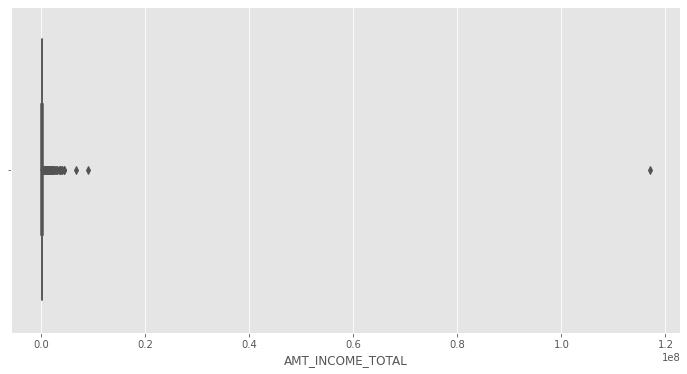

In [119]:
# AMT_INCOME_TOTAL
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.boxplot(x='AMT_INCOME_TOTAL', data=df, ax=ax)

In [120]:
# AMT_INCOME_TOTAL
# Remove outliers
df[df['AMT_INCOME_TOTAL'] > 90000]['TARGET'].value_counts()

0    201436
1     16942
Name: TARGET, dtype: int64

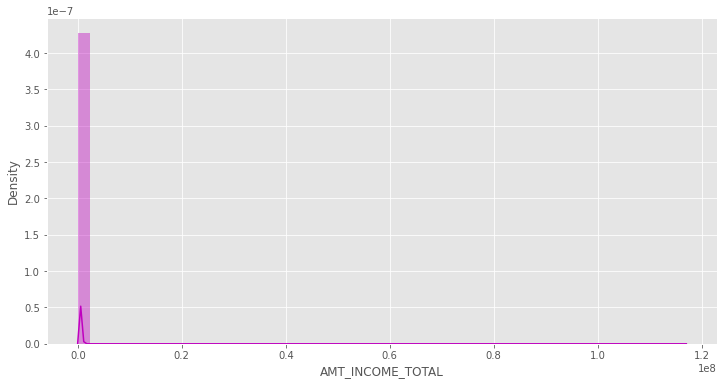

In [121]:
# AMT_INCOME_TOTAL
plt.figure(figsize=(12, 6))
sns.distplot(df['AMT_INCOME_TOTAL'], color='m')

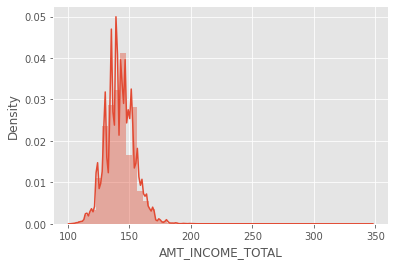

In [122]:
# AMT_INCOME_TOTAL
sns.distplot(df['AMT_INCOME_TOTAL'].apply(lambda x: np.log1p(x)**2))

In [123]:
# AMT_INCOME_TOTAL
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].apply(lambda x: np.log1p(x)**2)

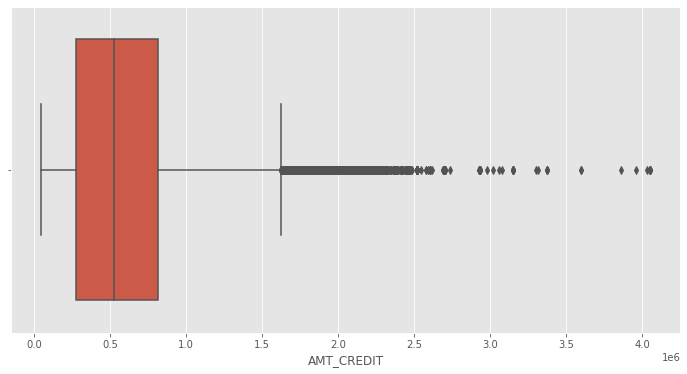

In [124]:
# AMT_CREDIT
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.boxplot(x='AMT_CREDIT', data=df, ax=ax)

In [125]:
# AMT_CREDIT
# Remove outliers
df[df['AMT_CREDIT'] > 540000]['TARGET'].value_counts()

0    115942
1      9112
Name: TARGET, dtype: int64

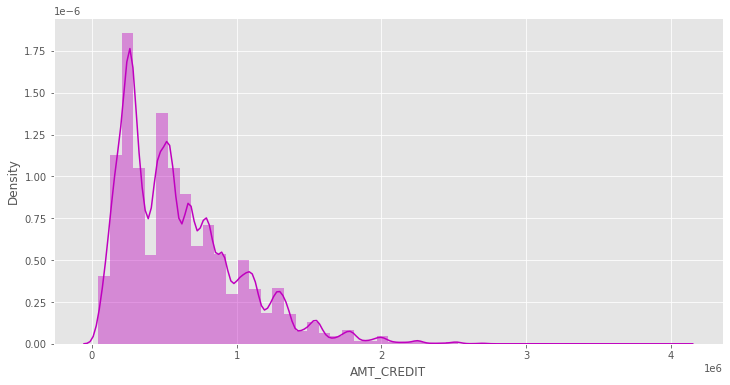

In [126]:
# AMT_CREDIT
plt.figure(figsize=(12, 6))
sns.distplot(df['AMT_CREDIT'], color='m')

### Observation

We see a right skewed variable

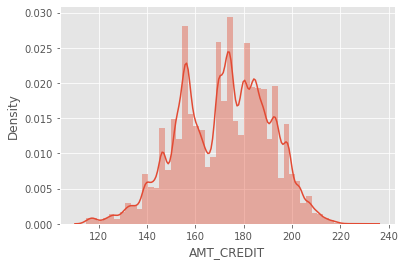

In [127]:
# AMT_CREDIT
sns.distplot(df['AMT_CREDIT'].apply(lambda x: np.log1p(x)**2))

In [128]:
# AMT_CREDIT
df['AMT_CREDIT'] = df['AMT_CREDIT'].apply(lambda x: np.log1p(x)**2)

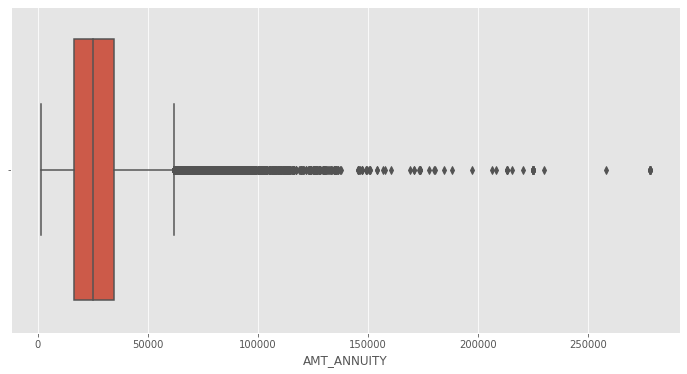

In [129]:
# AMT_ANNUITY
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.boxplot(x='AMT_ANNUITY', data=df, ax=ax)

In [130]:
# AMT_ANNUITY
# Remove outliers
df[df['AMT_ANNUITY'] > 18000]['TARGET'].value_counts()

0    173009
1     15041
Name: TARGET, dtype: int64

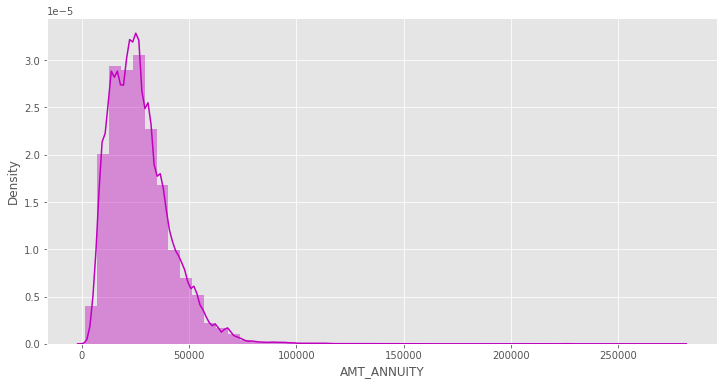

In [131]:
# AMT_ANNUITY
plt.figure(figsize=(12, 6))
sns.distplot(df['AMT_ANNUITY'], color='m')

### Observation

We see a right skewed variable

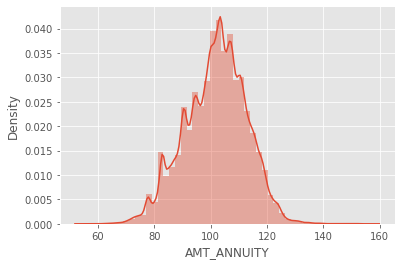

In [132]:
# AMT_ANNUITY
sns.distplot(df['AMT_ANNUITY'].apply(lambda x: np.log1p(x)**2))

In [133]:
# AMT_ANNUITY
df['AMT_ANNUITY'] = df['AMT_ANNUITY'].apply(lambda x: np.log1p(x)**2)

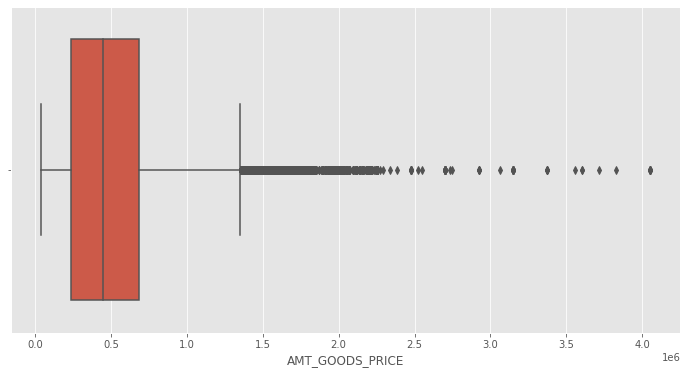

In [134]:
# AMT_GOODS_PRICE   
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.boxplot(x='AMT_GOODS_PRICE', data=df, ax=ax)

In [135]:
# AMT_GOODS_PRICE
# Remove outliers
df[df['AMT_GOODS_PRICE'] > 445500]['TARGET'].value_counts()

0    142455
1     11408
Name: TARGET, dtype: int64

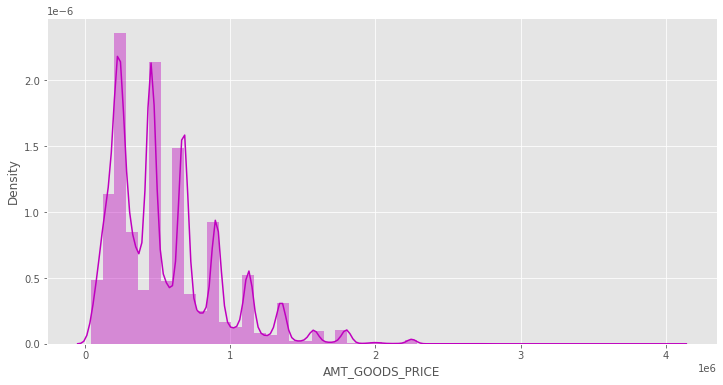

In [136]:
# AMT_GOODS_PRICE
plt.figure(figsize=(12, 6))
sns.distplot(df['AMT_GOODS_PRICE'], color='m')

### Observation

We see a right skewed variable

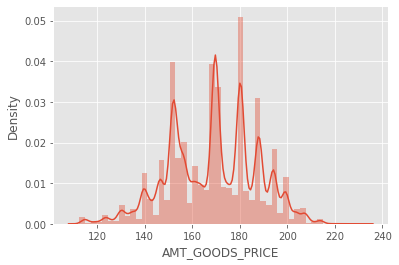

In [137]:
# AMT_GOODS_PRICE
sns.distplot(df['AMT_GOODS_PRICE'].apply(lambda x: np.log1p(x)**2))

In [138]:
# AMT_GOODS_PRICE
df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].apply(lambda x: np.log1p(x)**2)

In [139]:
# CNT_FAM_MEMBERS
df['CNT_FAM_MEMBERS'].value_counts()

2.000     137385
1.000      57082
3.000      45858
4.000      21756
5.000       3053
6.000        339
7.000         72
8.000         16
9.000          5
10.000         3
14.000         2
16.000         2
20.000         2
11.000         1
12.000         1
13.000         1
15.000         1
Name: CNT_FAM_MEMBERS, dtype: int64

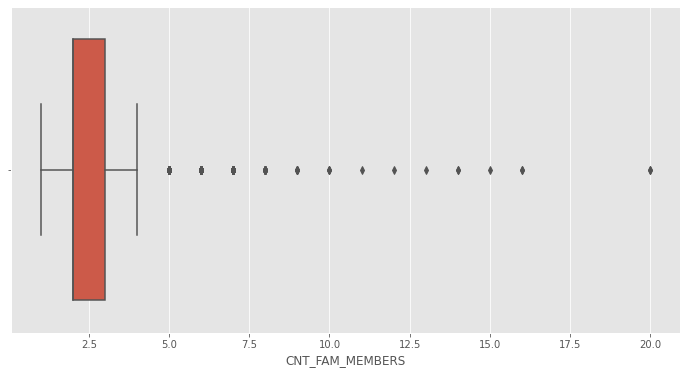

In [140]:
# CNT_FAM_MEMBERS
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.boxplot(x='CNT_FAM_MEMBERS', data=df, ax=ax)

In [141]:
# CNT_FAM_MEMBERS
# Remove outliers
df[df['CNT_FAM_MEMBERS'] < 5]['TARGET'].value_counts()

0    241918
1     20163
Name: TARGET, dtype: int64

In [142]:
# CNT_FAM_MEMBERS
df = df[df['CNT_FAM_MEMBERS'] < 5].reset_index(drop=True)

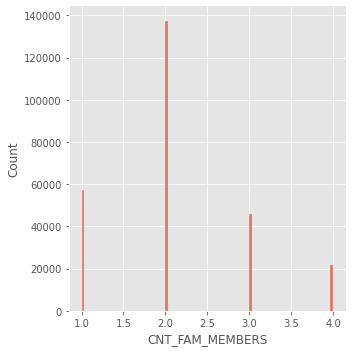

In [143]:
# CNT_FAM_MEMBERS
sns.displot(df['CNT_FAM_MEMBERS'])

In [146]:
# Final dimension
df.shape

(262081, 23)

# Exploratory Data Analysis

In [147]:
def BivariateAnalysisPlot(segment_by):
    """A funtion to analyze the impact 
    of continuous variables on target
    """
    fig, ax = plt.subplots(ncols=1, figsize = (10, 8))
    
    # Boxplot
    sns.boxplot(x='TARGET', y=segment_by, data=df)
    plt.title("Box plot of "+segment_by)
    
    plt.show()

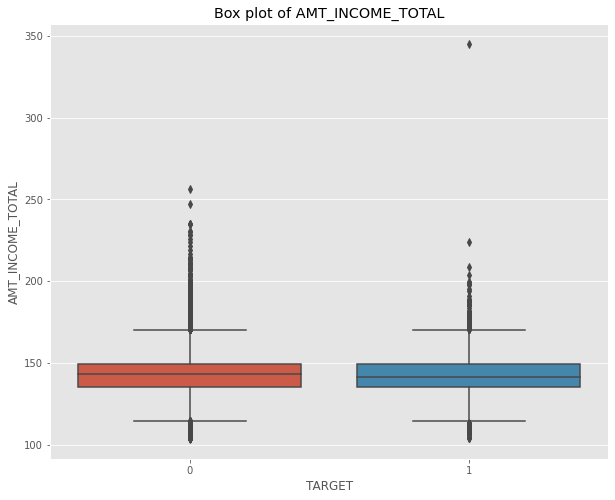

In [148]:
# AMT_INCOME_TOTAL
BivariateAnalysisPlot('AMT_INCOME_TOTAL') 

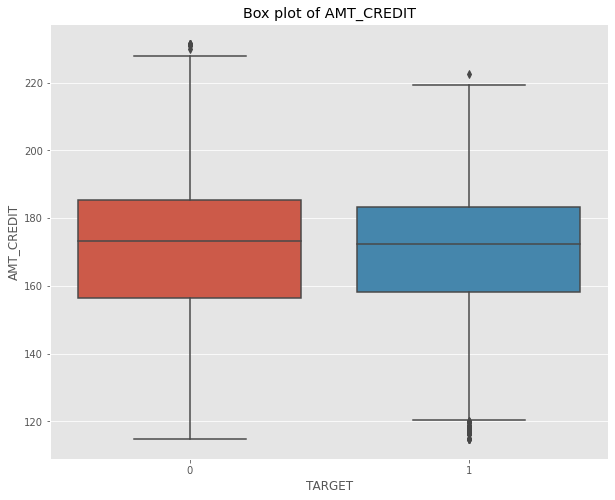

In [149]:
# AMT_CREDIT
BivariateAnalysisPlot('AMT_CREDIT')

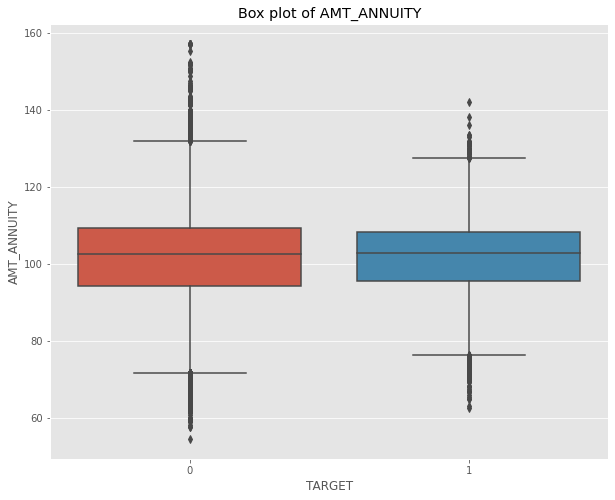

In [150]:
# AMT_ANNUITY
BivariateAnalysisPlot('AMT_ANNUITY')

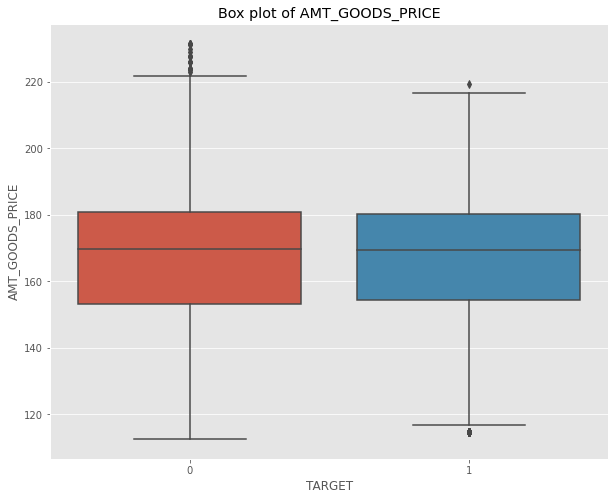

In [151]:
# AMT_GOODS_PRICE
BivariateAnalysisPlot('AMT_GOODS_PRICE')

# Multi-collinearity

A state of very high intercorrelations or inter-associations among the independent features in the dataset 

It is a type of disturbance in the data that is not handled well by ML models (mostly linear algorithms). Multi-collinearity may reduce overall coefficient of the model and cause unpredictable variance

This will lead to overfitting where the model may do great on a known training set but will fail with an unknown testing set


In [152]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [153]:
features = "+".join(df.columns.difference(['TARGET']))

In [155]:
# Perform vif correlation between variables
a, b = dmatrices(formula_like= 'TARGET ~ ' + features, 
                 data=df, 
                 return_type='dataframe')

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["Features"] = b.columns
print(vif)

    VIF Factor                                           Features
0        0.000                                          Intercept
1        1.235                                   CODE_GENDER[T.M]
2        1.000                                 CODE_GENDER[T.XNA]
3        1.215                                  FLAG_OWN_CAR[T.Y]
4        1.077                               FLAG_OWN_REALTY[T.Y]
5      349.609            NAME_EDUCATION_TYPE[T.Higher education]
6       59.319           NAME_EDUCATION_TYPE[T.Incomplete higher]
7       22.643             NAME_EDUCATION_TYPE[T.Lower secondary]
8      387.174  NAME_EDUCATION_TYPE[T.Secondary / secondary sp...
9        2.855                      NAME_FAMILY_STATUS[T.Married]
10         inf                    NAME_FAMILY_STATUS[T.Separated]
11         inf         NAME_FAMILY_STATUS[T.Single / not married]
12         inf                        NAME_FAMILY_STATUS[T.Widow]
13      26.589             NAME_HOUSING_TYPE[T.House / apartment]
14      10

# Create dummy variables for all categorical variables

In [156]:
# remove Xs , NAME_CONTRACT_TYPE and ORGANIZATION_TYPE
df_train = pd.get_dummies(df, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 
                                     'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 
                                     'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                                     'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'], drop_first=True)

# SMOTE

### Base Modeling: Logistic Regression

In [157]:
# Create function to evaluate our models
def evaluate_model(X_train, y_train, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    diff = scores.mean() - model.score(X_test, y_test)
    SD = diff / scores.std()
    
    print(f'Training Score:{model.score(X_train, y_train)}')
    print(f'Cross V Score: {scores.mean()} +/- {scores.std()}')
    print(f'Testing Score: {model.score(X_test, y_test)}')
    print(f'Cross & Test Diff: {diff}')
    print(f'Standard Deviations Away: {SD}')
    print(confusion_matrix(y_test, preds))

X = df_train.loc[:, df_train.columns != 'TARGET'] # Feature matrix excl Target variable
y = df_train.loc[:, 'TARGET'] # Target variable

In [158]:
# Train/test split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Initialize base model
lr = LogisticRegression(random_state=0, solver='newton-cg', max_iter=1000)

In [159]:
# Base model evaluation
evaluate_model(X_train, y_train, lr)

Training Score:0.9230463980463981
Cross V Score: 0.9230413105413106 +/- 7.194818693391788e-06
Testing Score: 0.9230475725339967
Cross & Test Diff: -6.261992686162898e-06
Standard Deviations Away: -0.8703475310523584
[[60479     1]
 [ 5041     0]]


### Observation

Our cv score is high due to us having an imbalanced dataset

SMOTE (Synthetic Minority Over-sampling Technique) is a type of over-sampling procedure that is used to correct the imbalances in the groups

This technique creates new data instances of the **minority** groups by copying existing minority instances and making small changes to them

Oversampling’s purpose is for us to feel confident the data we generate are real examples of already existing data. This inherently comes with the issue of creating more of the same data we currently have, without adding any diversity to our dataset, and producing effects such as overfitting





In [160]:
# We want to implement our model on LIVE data
# Thus, we add synthetic data to the training set
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [161]:
# Model evaluation with SMOTE
evaluate_model(X_train_SMOTE, y_train_SMOTE, lr)

Training Score:0.6167010218366604
Cross V Score: 0.6161829460597121 +/- 0.002423656825474781
Testing Score: 0.5933670121029899
Cross & Test Diff: 0.022815933956722212
Standard Deviations Away: 9.413846761186042
[[35885 24595]
 [ 2048  2993]]


### Observation

As we can see, our model was able to more accurately predict the testing data with the SMOTE data included. However, one issue that causes concern is our cv score

The cv score is used to evaluate our model on a limited set of data in order to predict how the model will perform on real world data

Ideally we want our **cv score** to be the same or near our testing score. In this case, our scores are diverging due to synthetic data being included in validation data

In [162]:
# Imbalanced-learn (pipeline) module
from imblearn.pipeline import make_pipeline
pipeline = make_pipeline(smt, lr)
evaluate_model(X_train, y_train, pipeline)

Training Score:0.5977920227920228
Cross V Score: 0.5990588115588116 +/- 0.0029220266058906565
Testing Score: 0.5933670121029899
Cross & Test Diff: 0.005691799455821656
Standard Deviations Away: 1.9478944662404094
[[35885 24595]
 [ 2048  2993]]


### Observation

Our cv score now more accurately reflects the actual performance that we can expect from our model in the the real world

# Feature Scaling

In [163]:
# Scaling features
scl = StandardScaler()
fields = df_train.columns.values[:-1]

df_new = pd.DataFrame(scl.fit_transform(df_train[fields]), index=df.index, columns=fields)
df_new['TARGET'] = df_train['TARGET']
df_new['TARGET'].value_counts()

0    241918
1     20163
Name: TARGET, dtype: int64

# Correlation Values

In [165]:
df_new.corr()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment
TARGET,1.000,0.017,-0.014,-0.012,-0.001,-0.022,-0.034,0.008,0.055,0.001,0.003,0.001,-0.012,-0.002,0.020,0.052,-0.001,-0.021,-0.006,-0.003,-0.007,-0.001,0.002,0.003,-0.001,0.008,-0.010,-0.001,-0.045,-0.023,-0.002,-0.001,0.055,-0.053,0.003,0.011,0.047,-0.021,0.001,0.023,-0.019,-0.028,0.003,-0.005,0.020
CNT_CHILDREN,0.017,1.000,0.035,0.001,0.021,-0.002,-0.022,0.857,0.021,0.001,0.000,-0.001,-0.008,-0.008,-0.045,0.057,0.002,0.104,-0.007,0.013,0.006,-0.000,-0.002,0.002,0.035,-0.025,0.038,0.002,-0.250,0.046,0.003,0.000,0.137,0.045,0.014,-0.013,-0.045,0.161,-0.012,-0.131,-0.106,-0.030,-0.002,0.015,0.014
AMT_INCOME_TOTAL,-0.014,0.035,1.000,0.417,0.482,0.422,0.177,0.037,-0.215,0.003,0.006,0.008,0.073,0.020,0.057,0.219,0.001,0.226,0.008,-0.033,-0.013,0.000,-0.005,-0.013,-0.026,0.034,0.210,-0.002,-0.204,0.039,0.001,0.002,-0.040,0.239,0.037,-0.056,-0.229,0.012,0.013,0.012,-0.071,-0.000,0.001,0.021,0.005
AMT_CREDIT,-0.012,0.001,0.417,1.000,0.841,0.989,0.089,0.067,-0.092,-0.003,0.004,-0.001,0.052,0.016,-0.038,0.026,-0.001,0.110,-0.047,-0.007,0.021,-0.001,-0.004,-0.007,0.025,-0.029,0.096,-0.001,-0.080,0.043,-0.002,0.001,-0.042,0.108,-0.012,-0.030,-0.091,0.140,-0.031,-0.094,-0.067,0.037,0.004,0.007,-0.021
AMT_ANNUITY,-0.001,0.021,0.482,0.841,1.000,0.841,0.105,0.084,-0.117,0.003,0.002,0.012,0.041,0.012,-0.005,0.078,-0.002,0.137,-0.014,-0.014,0.021,0.001,0.000,-0.004,0.024,-0.025,0.121,-0.002,-0.116,0.035,-0.001,0.001,-0.031,0.126,0.002,-0.033,-0.113,0.144,-0.041,-0.079,-0.086,0.021,0.002,0.010,-0.010
AMT_GOODS_PRICE,-0.022,-0.002,0.422,0.989,0.841,1.000,0.096,0.067,-0.095,-0.002,0.004,-0.002,0.054,0.016,-0.043,0.026,-0.001,0.115,-0.052,-0.008,0.022,-0.001,-0.005,-0.008,0.024,-0.029,0.098,-0.001,-0.079,0.043,-0.002,0.002,-0.044,0.121,-0.010,-0.032,-0.104,0.146,-0.033,-0.096,-0.070,0.039,-0.001,0.007,-0.021
REGION_POPULATION_RELATIVE,-0.034,-0.022,0.177,0.089,0.105,0.096,1.000,-0.021,-0.529,-0.002,0.001,-0.002,0.079,-0.001,0.001,0.017,0.003,0.043,0.012,-0.000,-0.012,0.001,0.003,-0.001,0.003,0.008,0.147,-0.003,-0.008,-0.015,0.000,0.000,-0.111,0.063,0.017,-0.014,-0.063,-0.006,0.005,0.010,-0.006,-0.005,0.042,-0.012,-0.018
CNT_FAM_MEMBERS,0.008,0.857,0.037,0.067,0.084,0.067,-0.021,1.000,0.026,0.002,-0.001,-0.000,-0.006,-0.004,-0.030,0.096,0.003,0.155,0.004,0.002,0.036,-0.001,-0.013,-0.012,0.079,-0.065,0.034,0.002,-0.239,0.049,0.002,-0.002,0.130,0.032,-0.004,-0.017,-0.025,0.542,-0.242,-0.459,-0.289,0.017,-0.015,0.013,-0.001
REGION_RATING_CLIENT,0.055,0.021,-0.215,-0.092,-0.117,-0.095,-0.529,0.026,1.000,0.006,-0.002,0.002,-0.070,0.006,0.011,-0.021,0.002,-0.024,0.004,0.003,0.005,-0.001,-0.008,-0.005,0.005,-0.004,-0.149,-0.000,0.038,0.000,0.000,0.001,0.097,-0.062,-0.019,0.016,0.063,0.017,-0.016,-0.019,0.009,0.023,-0.080,0.005,0.017
AMT_REQ_CREDIT_BUREAU_HOUR,0.001,0.001,0.003,-0.003,0.003,

# Confusion Matrix

In [166]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): 
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=['Non Default', 'Default']
    cmap = plt.cm.Blues
    title = 'Confusion Matrix'
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

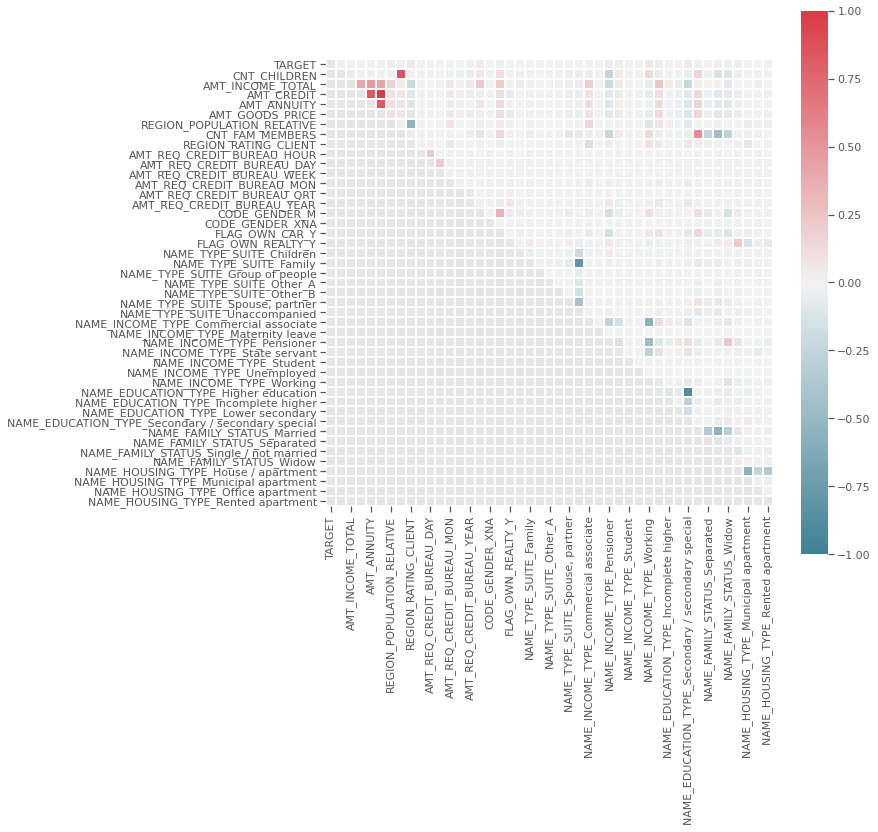

In [167]:
dataviz = df_new
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10, 10)) 
corr = dataviz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, linewidths=1, 
            vmin=-1, 
            vmax=1, 
            square=True, 
            cbar=True, 
            center=0, 
            ax=ax, 
            mask=mask
            )

# Model Evaluation

### Draft Modeling: Random Forest

In [168]:
rf = ensemble.RandomForestClassifier(n_estimators=200, criterion='gini',
                                     max_depth=None,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0,
                                     max_features='auto',
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     bootstrap=True,
                                     oob_score=False,
                                     n_jobs=1,
                                     random_state=None,
                                     verbose=0,
                                     warm_start=False,
                                     class_weight=None
                                     )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     60480
           1       0.29      0.00      0.00      5041

    accuracy                           0.92     65521
   macro avg       0.60      0.50      0.48     65521
weighted avg       0.87      0.92      0.89     65521



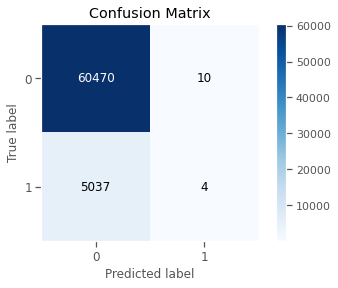

In [170]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [171]:
fi = rf.feature_importances_

In [172]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {'feature': feature_cols, 'importance': rf.feature_importances_}
)

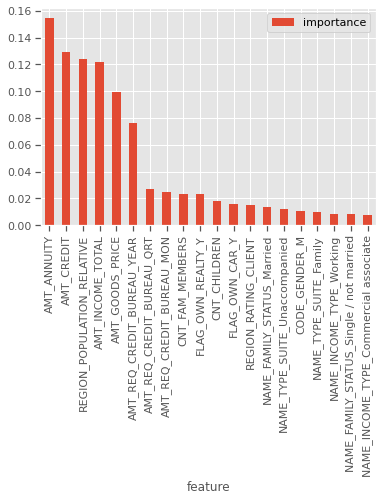

In [173]:
importance = pd.DataFrame(
    {'feature': feature_cols[:], 'importance': rf.feature_importances_[:]}
)

importance.sort_values(by='importance', axis=0,
                       ascending=False,
                       inplace=True,
                       kind='quicksort',
                       na_position='last'
                       )

importance[:20].plot(x='feature', y='importance', kind='bar')

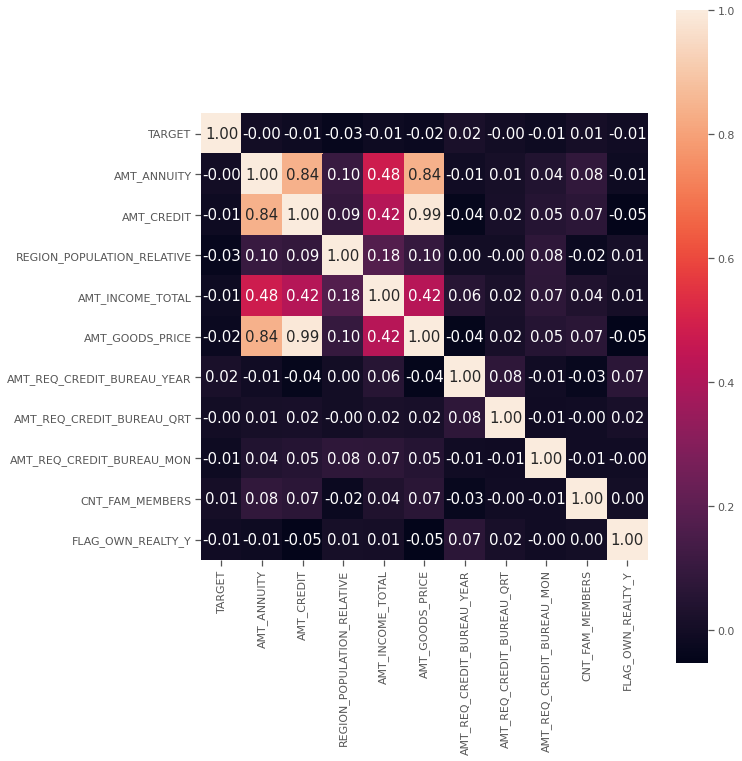

In [174]:
# Plot heatmap
cols = list(importance.feature[:10])
cols.insert(0, 'TARGET')
corrcoef_map = np.corrcoef(df_train[cols].values.T)
fig, ax = plt.subplots(figsize=(10, 12))  # Sample figsize in inches
hm = sns.heatmap(corrcoef_map, cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,
                 ax=ax
                 )

### Modeling Random Forest

In [175]:
rf = ensemble.RandomForestClassifier(n_estimators=800, criterion='gini',
                                     max_depth=None,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0,
                                     max_features='auto',
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     bootstrap=True,
                                     oob_score=False,
                                     n_jobs=1,
                                     random_state=None,
                                     verbose=0,
                                     warm_start=False,
                                     class_weight=None
                                     )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     60480
           1       0.25      0.00      0.00      5041

    accuracy                           0.92     65521
   macro avg       0.59      0.50      0.48     65521
weighted avg       0.87      0.92      0.89     65521



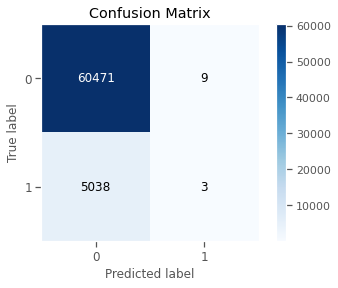

In [177]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [178]:
fi = rf.feature_importances_

In [179]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {'feature': feature_cols, 'importance': rf.feature_importances_}
)

Text(0, 0.5, 'importance')

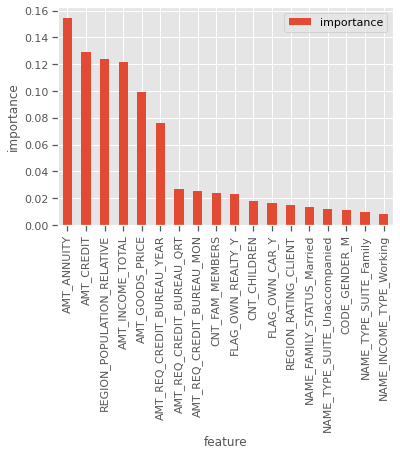

In [180]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {'feature': feature_cols[:], 'importance': rf.feature_importances_[:]}
)

importance.sort_values(by='importance', axis=0,
                       ascending=False,
                       inplace=True,
                       kind='quicksort',
                       na_position='last'
                       )

importance[:18].plot(x='feature', y='importance', kind='bar')
plt.ylabel('importance')

### Decision tree

In [181]:
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=5,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0,
                                  max_features=None,
                                  random_state=None,
                                  max_leaf_nodes=None,
                                  min_impurity_decrease=0.0,
                                  min_impurity_split=None,
                                  class_weight=None,
                                  presort=False
                                  )

model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [182]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     60480
           1       0.00      0.00      0.00      5041

    accuracy                           0.92     65521
   macro avg       0.46      0.50      0.48     65521
weighted avg       0.85      0.92      0.89     65521



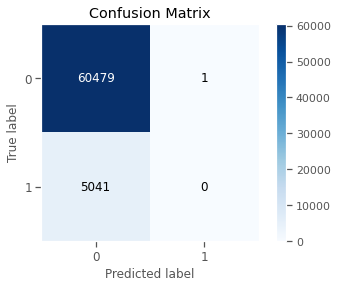

In [183]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

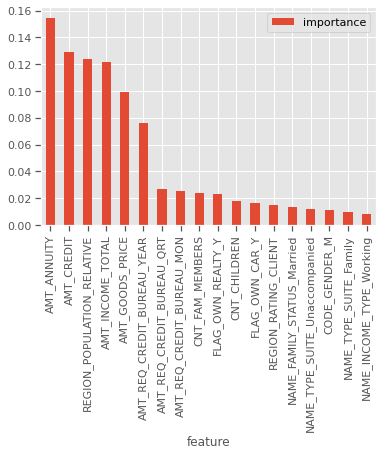

In [184]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {'feature': feature_cols[:], 'importance': rf.feature_importances_[:]}
)

importance.sort_values(by='importance', axis=0, 
                       ascending=False,
                       inplace=True,
                       kind='quicksort',
                       na_position='last'
                       )

importance[:18].plot(x='feature', y='importance', kind='bar')

### Gradient Boosting Classifier

In [185]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,
                                 n_estimators=200,
                                 subsample=1.0,
                                 criterion='friedman_mse',
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.0,
                                 max_depth=3,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None,
                                 init=None,
                                 random_state=None,
                                 max_features=None
                                 )

model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     60480
           1       0.00      0.00      0.00      5041

    accuracy                           0.92     65521
   macro avg       0.46      0.50      0.48     65521
weighted avg       0.85      0.92      0.89     65521



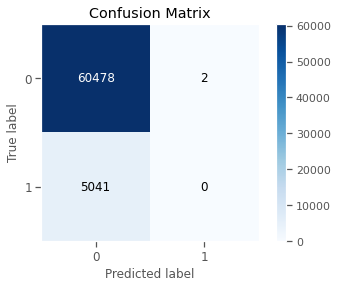

In [187]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)